# 1. Set-up
- Import libraries
- Define directories
- Split arrays into single, binary and weird

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as f
from os import listdir

In [2]:
path = '/home/puck/Documents/BRP/data' #puck
#path = r'C:\Users\joepn\OneDrive\Documenten\BRP\data' #joep

In [3]:
#The images containing weird artifacts that make them useless
weird_names = np.array(['2MASSJ11320835-5803199', '2MASSJ12041439-6418516', 
                        '2MASSJ12123577-5520273', '2MASSJ12192161-6454101', 
                        '2MASSJ12205449-6457242', '2MASSJ12472196-6808397',
                        '2MASSJ12582559-7028490', '2MASSJ13032904-4723160',])

#2MASSJ13032904-4723160 is star without flux image

In [4]:
#The binaries we found in our initial search
bin1 = np.array(['2MASSJ11555771-5254008', '2MASSJ12560830-6926539', 
                 '2MASSJ13015435-4249422', '2MASSJ13130714-4537438', 
                 'CD-43_3604', 'CVSO_751', 'Gaia_EDR3_3008386787098934144',
                 'HD_283629', 'HD_284266', 'HD_286179', 'UCAC4_454-011718', 
                 'UCAC4_475-014428', 'UCAC4_495-030196','UCAC4_501-011878'])

#The binaries we found in our second searcg
bin2 = np.array(['2MASSJ10065573-6352086', '2MASSJ11272881-3952572',
                 '2MASSJ11445217-6438548', '2MASSJ11452016-5749094',
                 '2MASSJ12163007-6711477', '2MASSJ12185802-5737191',
                 '2MASSJ12210808-5212226', '2MASSJ12234012-5616325',
                 '2MASSJ13055087-5304181', '2MASSJ13103245-4817036',
                 '2MASSJ13174687-4456534', '2MASSJ13335481-6536414',
                 'CoRoT_102718810', 'Gaia_EDR3_3014970387847972096',
                 'IRAS_08131-4432', 'RX_J2302.6+0034', 'UCAC4_127-038351',
                 'UCAC4_134-015937', 'UCAC4_406-011818', 'UCAC4_461-018326',
                 'UCAC4_482-118442', 'UCAC4_496-013657', 'UCAC4_519-042115',
                 'V1319_TAU'])

bin_names = np.append(bin1, bin2)

In [5]:
sin_wispit = np.array(['2MASS_J05162151+1147472', '2MASS_J05264348+0143538',
                       '2MASS_J06145339+0003000', 'GAIA_DR3_5854897321965963264',
                       'HD_285372', 'HD_285579', 'HD_285778','HD_285840',
                       'J_618A', 'NSVS_14407747', 'UCAC4_141-082231', 
                       'UCAC4_200-015587', 'UCAC4_280-010722', 'UCAC4_312-058127',
                       'UCAC4_319-026529', 'UCAC4_446-032370', 'UCAC4_537-015077',
                       'V_V1267_CEN', 'V_V1346_Tau', 'V_V826_Tau'])

sin_yses = np.array(['2MASSJ10560422-6152054', '2MASSJ11175186-6402056',
                     '2MASSJ11275535-6626046', '2MASSJ11454278-5739285',
                     '2MASSJ12065276-5044463', '2MASSJ12090225-5120410',
                     '2MASSJ12101065-4855476', '2MASSJ12113142-5816533',
                     '2MASSJ12121119-4950081', '2MASSJ12160114-5614068',
                     '2MASSJ12164023-7007361', '2MASSJ12195938-5018404',
                     '2MASSJ12210499-7116493', '2MASSJ12220430-4841248',
                     '2MASSJ12240975-6003416', '2MASSJ12264842-5215070',
                     '2MASSJ12302957-5222269', '2MASSJ12333381-5714066',
                     '2MASSJ12361767-5042421', '2MASSJ12365895-5412178',
                     '2MASSJ12374883-5209463', '2MASSJ12383556-5916438',
                     '2MASSJ12391404-5454469', '2MASSJ12393796-5731406',
                     '2MASSJ12404664-5211046', '2MASSJ12405458-5031550',
                     '2MASSJ12454884-5410583', '2MASSJ12480778-4439167',
                     '2MASSJ12505143-5156353', '2MASSJ12510556-5253121',
                     '2MASSJ13015069-5304581', '2MASSJ13064012-5159386',
                     '2MASSJ13065439-4541313', '2MASSJ13095880-4527388',
                     '2MASSJ13121764-5508258', '2MASSJ13233587-4718467',
                     '2MASSJ13251211-6456207', '2MASSJ13334410-6359345',
                     '2MASSJ13343188-4209305', '2MASSJ13354082-4818124',
                     '2MASSJ13380596-4344564', '2MASSJ13381128-5214251',
                     '2MASSJ13444279-6347495', '2MASSJ13455599-5222255'])

sin_names = np.append(sin_wispit, sin_yses)

# 2. Retrieve the data 
- Write a function which retrieves the name of the star and the date of observation
- Write a function to retrieve the data of one star
- Write a function which combines all this data into one array

In [6]:
def star_info(star_list, idx):
    ''' Returns the name of the star and date of observation as a tuple. '''
    return star_list[idx], listdir(f'{path}/{star_list[idx]}')[0]

In [7]:
def star_data(star_list):
    ''' Returns the flux data of the stars in star_list in a 3d np.array. '''
    arr = np.empty((len(star_list), 1024, 1024))
    for i in range(len(star_list)):
        name, date = star_info(star_list, i)
        with f.open(f'{path}/{name}/{date}/B_H/calibration/flux/' + 
                    f'{name}_{date}_cube_flux_processed_right.fits') as hdul:
            data = hdul[0].data
        arr[i] = data[0]
    return arr

In [8]:
sin_y_data = star_data(sin_yses) #array with the data of the YSES stars
sin_w_data = star_data(sin_wispit) #array with the data of WiSPiT stars

# 3. Data reduction
- Circle of radius 100 pixels around center
- 200 x 200 pixelsaround center

In [9]:
def mask_but_center(arr):
    ''' Masks everything but the area with radius r in a circle around the center. '''
    x = y = np.linspace(-(len(arr))/2, (len(arr))/2, len(arr))
    x_grid, y_grid = np.meshgrid(x, y)
    r_grid = np.sqrt(x_grid**2 + y_grid**2)
    arr[r_grid > 100] = None 
    return arr

def normalize(arr):
    ''' Normalizes the array '''
    arr = np.array(arr,dtype=np.float64)
    return arr/np.nanmax(arr)

def data_reduction(arr):
    ''' Masks and then normalizes an array with one image. '''
    mask_arr = mask_but_center(arr)
    norm_arr = normalize(mask_arr)
    return norm_arr

In [10]:
#Array with all the single stars but then masked and normalized
sin_y_data_copy = sin_y_data.copy()
sin_y_clb = np.array([data_reduction(sin_y_data_copy[i]) for i in range(len(sin_yses))]) #only YSES

sin_w_data_copy = sin_w_data.copy()
sin_w_clb = np.array([data_reduction(sin_w_data_copy[i]) for i in range(len(sin_wispit))]) #only WISPIT

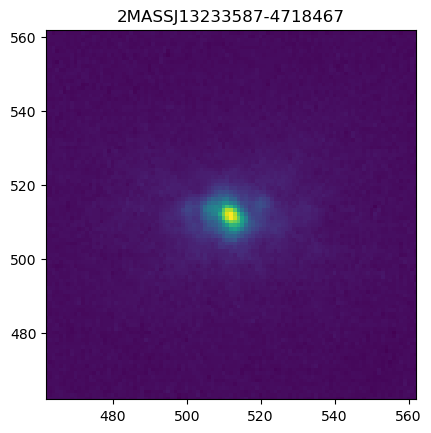

In [11]:
plt.title(f'{sin_yses[35]}')
plt.imshow(sin_y_clb[35])
plt.xlim((512-50), (512+50))
plt.ylim((512-50), (512+50))
plt.show()

In [1]:
#np.save('YSES.npy', sin_y_clb)

# 4. Finding the perfect median star
- Cut out an aperture around the star
- Calculate the RMS of each little square to determine the noise
- Combine all these RMS in an array and sort them from best to worst
- Write a function that calculates the median of an array of stars
- Write a function 

In [13]:
def mask_aperture(arr):
    ''' Picks out a ring between radius 20 and 30 around the star and returns this.  '''
    x = y = np.linspace(-(len(arr))/2, (len(arr))/2, len(arr))
    x_grid, y_grid = np.meshgrid(x, y)
    r_grid = np.sqrt(x_grid**2 + y_grid**2)
    arr[r_grid > 30] = None 
    arr[r_grid < 20] = None
    return arr

def arr_sort_rms(arr):
    ''' Returns an array with indexes of the image with the best rms first and the worst rms last and
    returns the single star array sorted from best to worst rms. '''
    rms_arr = np.nanstd(arr, axis = (1, 2)) #gives an array with rms's for every aperture of every image
    idx = np.argsort(rms_arr) 
    return idx, arr[idx]

# YSES

In [14]:
#Array with all YSES single stars and everything is masked but the aperture
sin_y_clb_copy = sin_y_clb.copy()
sin_y_aper = np.array([mask_aperture(sin_y_clb_copy[i]) for i in range(len(sin_yses))]) #Only YSES

In [15]:
star1 = sin_y_aper[1]
star2 = sin_y_aper[2]

print(np.nanstd(star1))
print(np.nanstd(np.array([star1, star2]), axis = (1, 2)))

print(np.nanmean(np.array([star1, star2]), axis = (1, 2)))

0.0013615699319852713
[0.00136157 0.00087749]
[0.00239741 0.00134133]


In [16]:
#Calibrated and apertured data cube for the YSES single stars, ordered from best to worst rms. 
rms_y_idx, sin_y_rms_sort = arr_sort_rms(sin_y_aper)
print(rms_y_idx)

[26  9 22 10 16 15 28 19 31  0  7  5  8 21 12 24 43  2 32 38 17  3 33 11
 42 30 25 27 14  1 18 36 20 41 40  6 13  4 34 39 23 29 37 35]


In [17]:
yses_names_sort = sin_yses[rms_y_idx]

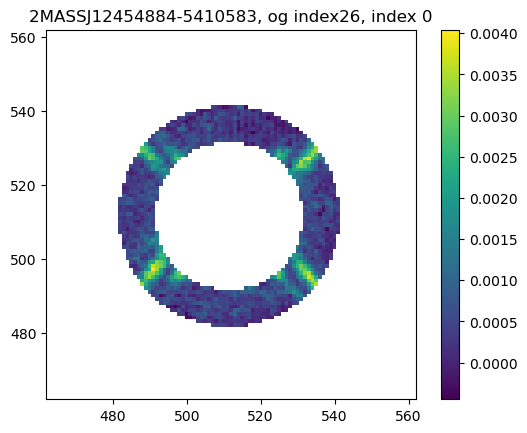

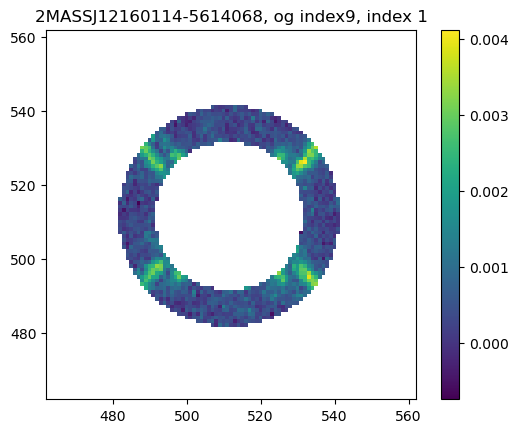

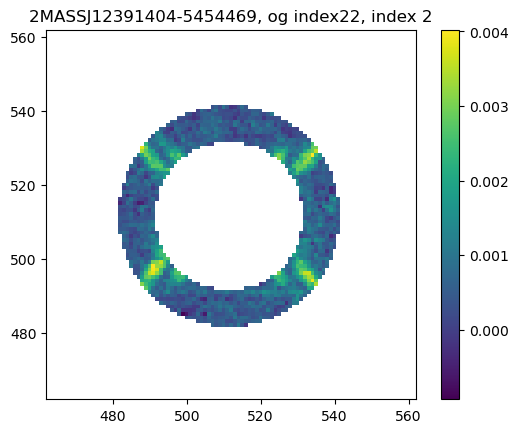

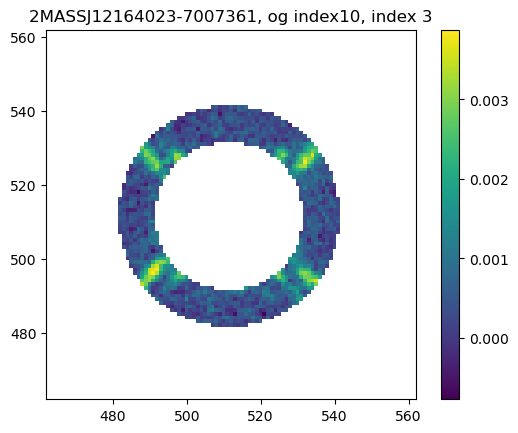

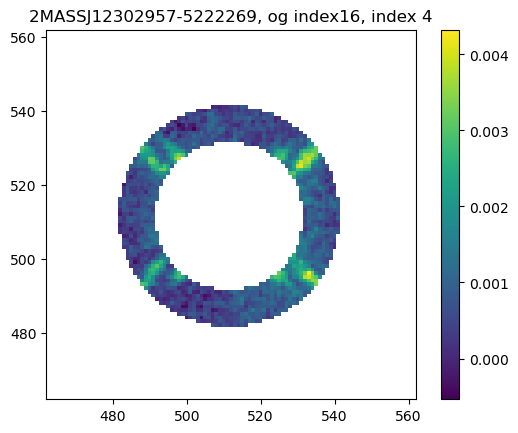

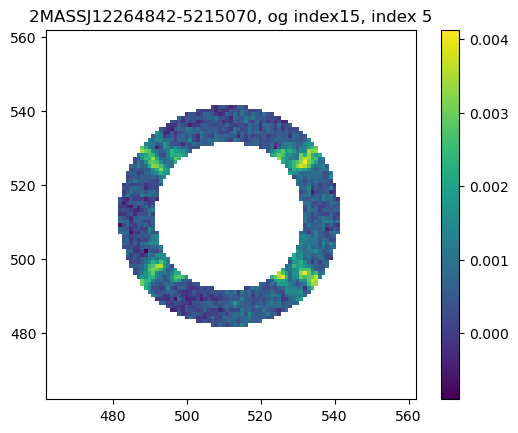

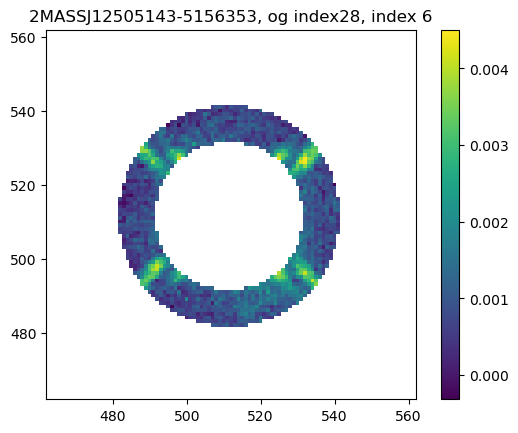

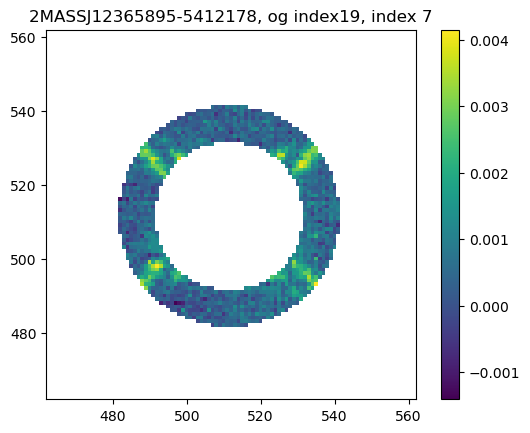

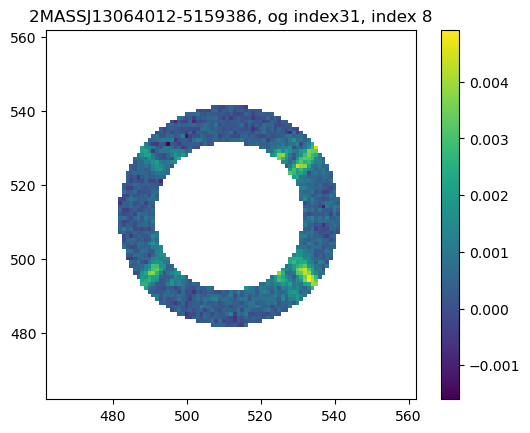

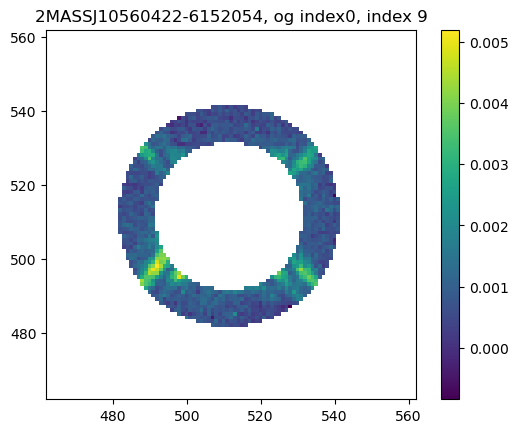

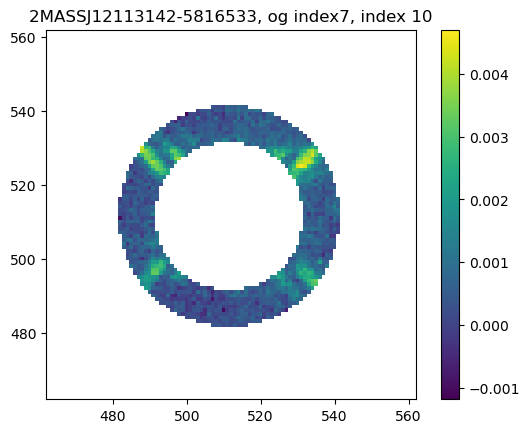

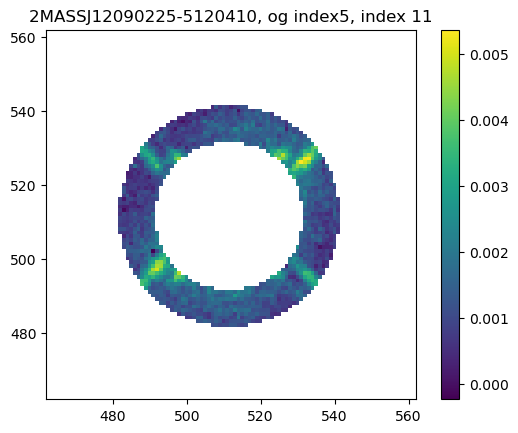

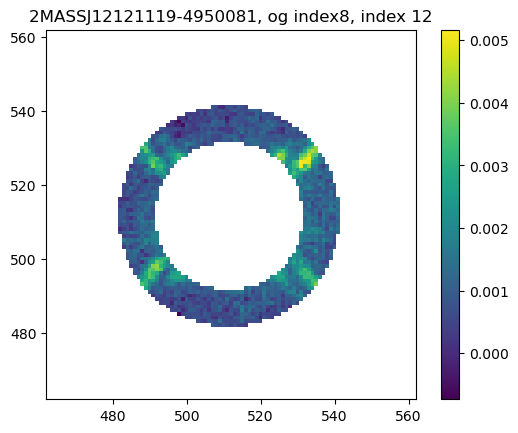

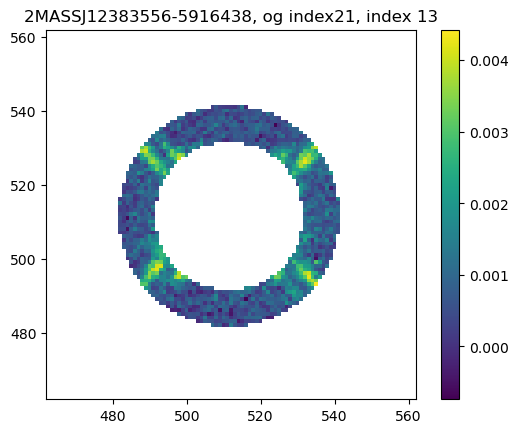

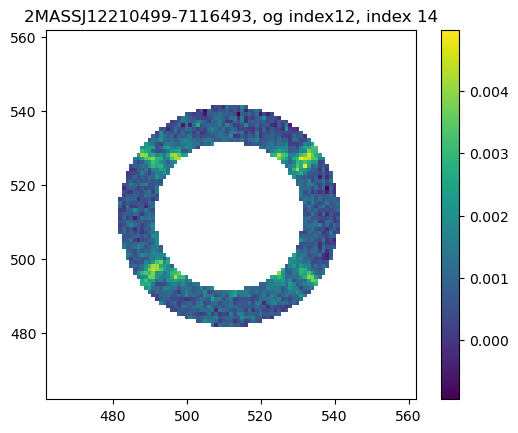

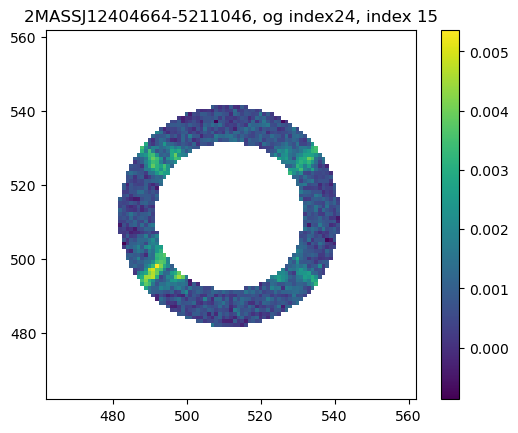

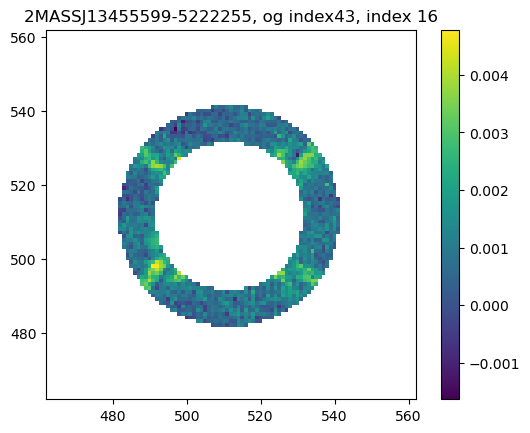

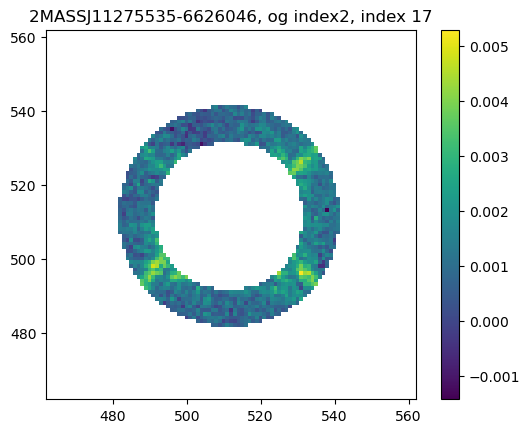

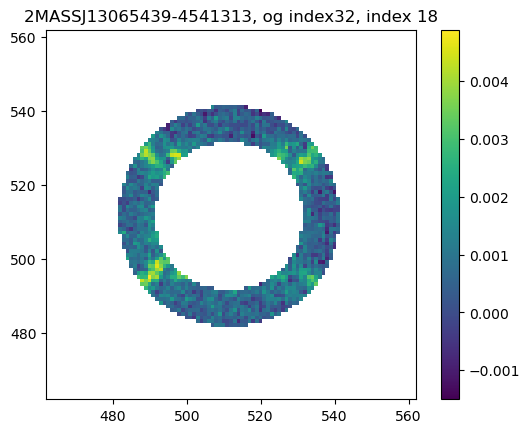

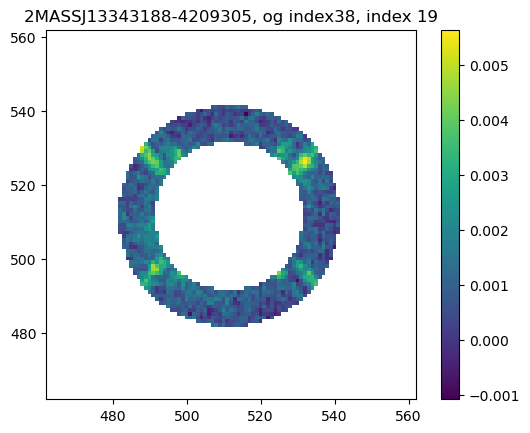

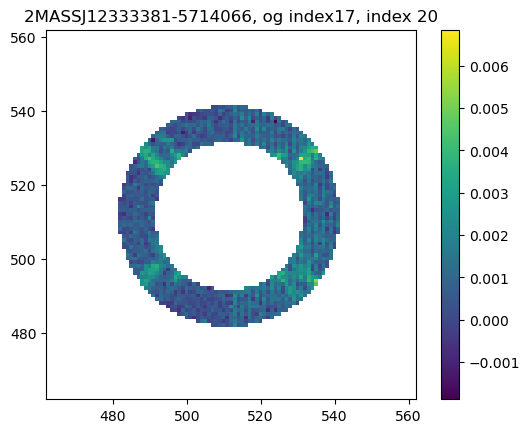

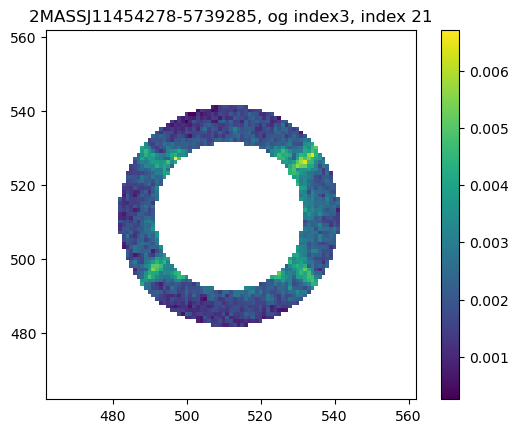

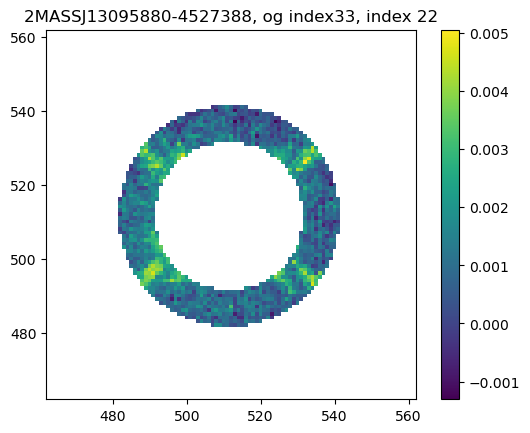

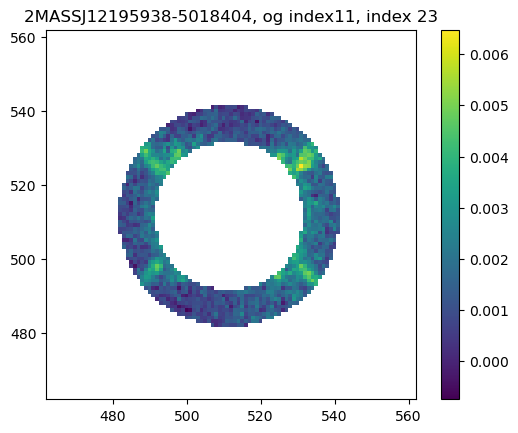

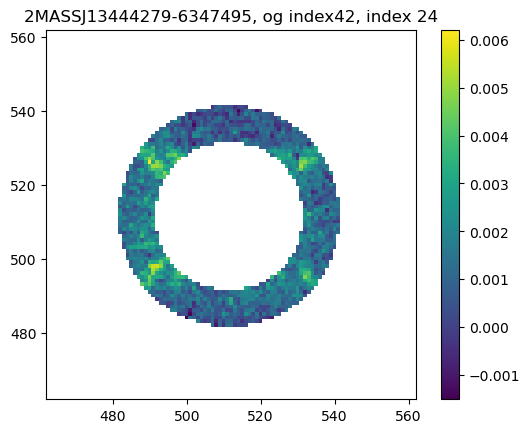

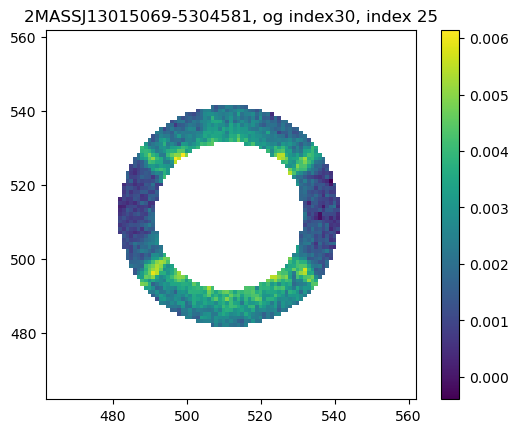

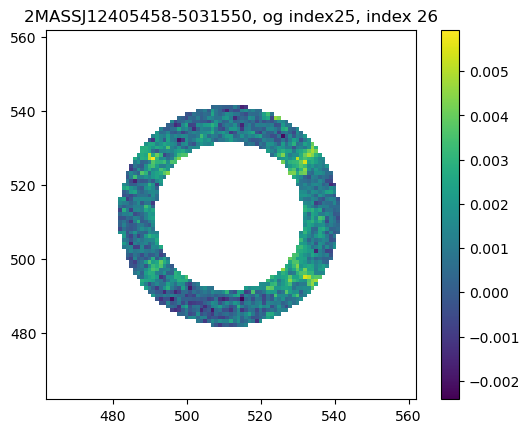

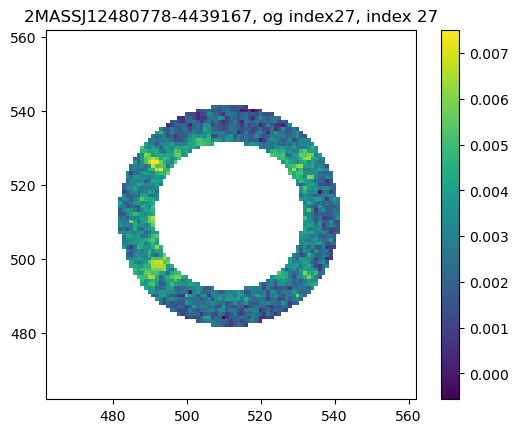

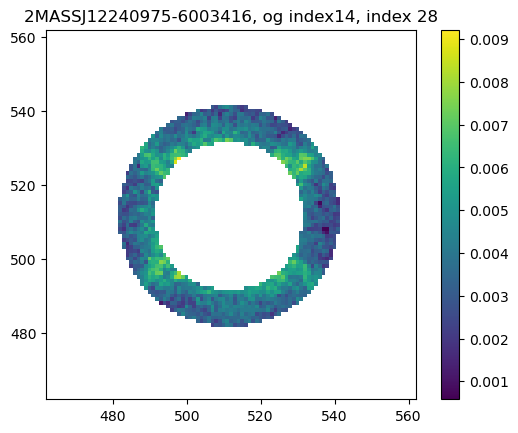

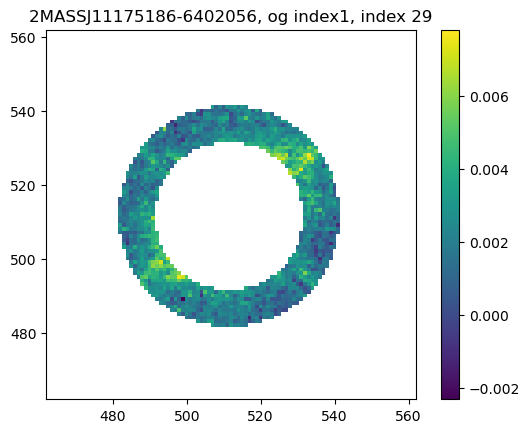

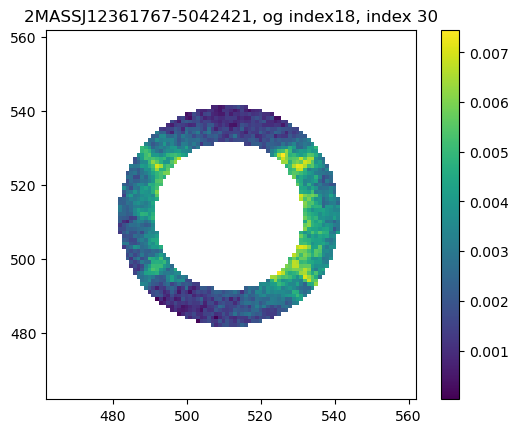

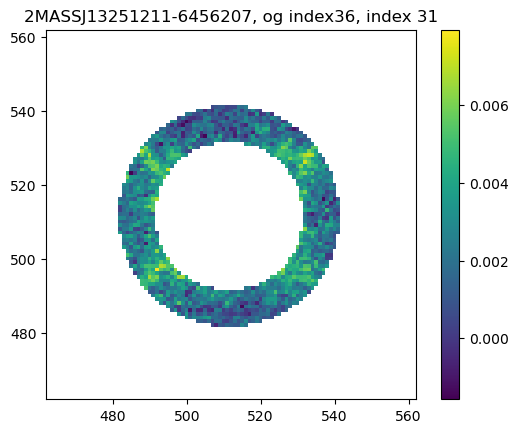

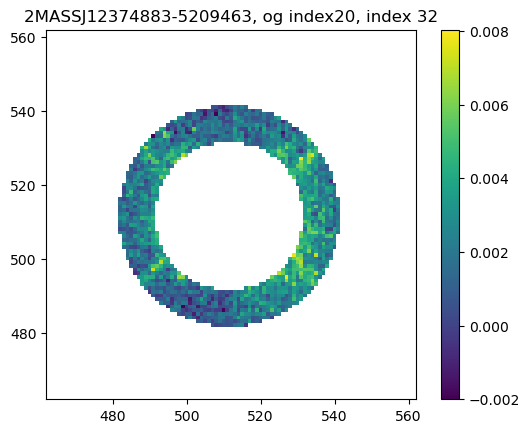

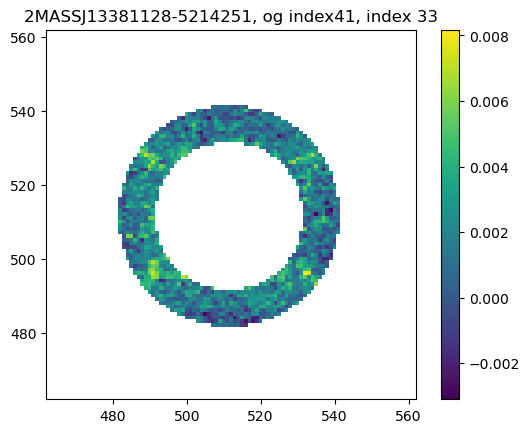

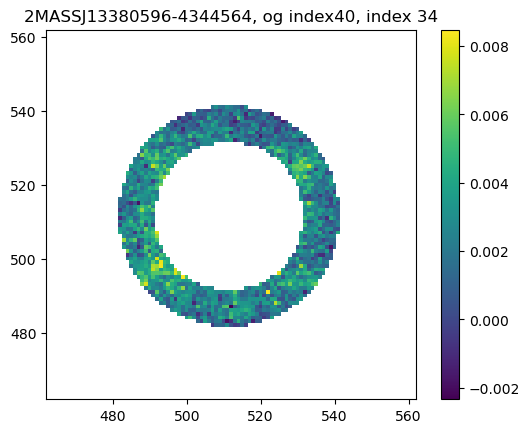

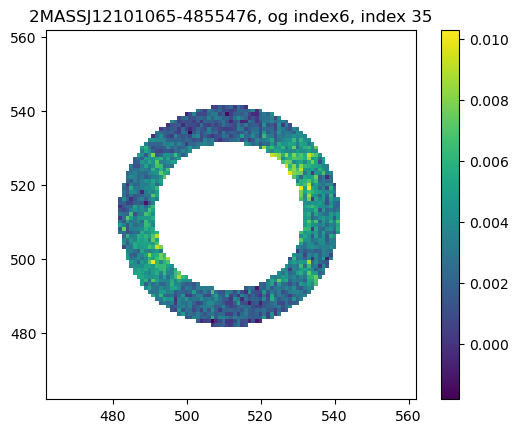

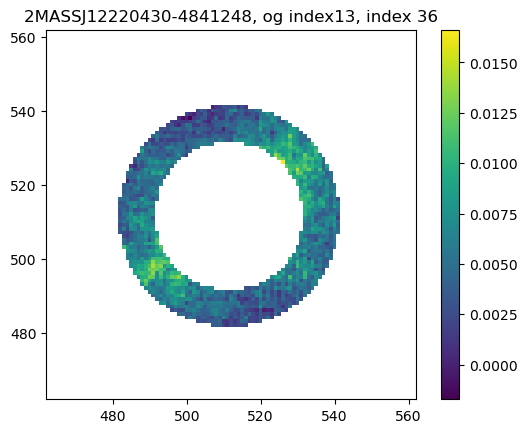

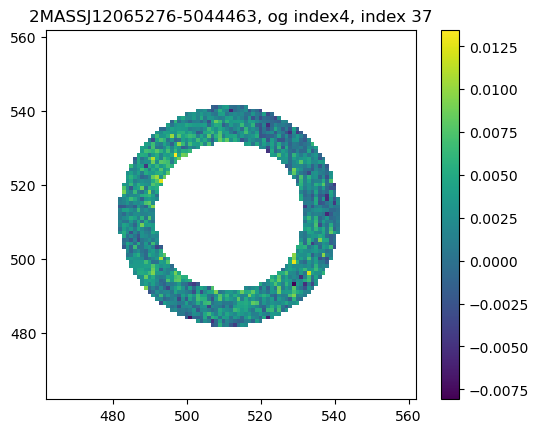

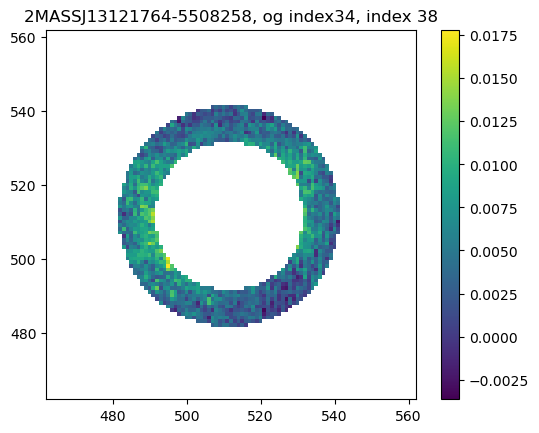

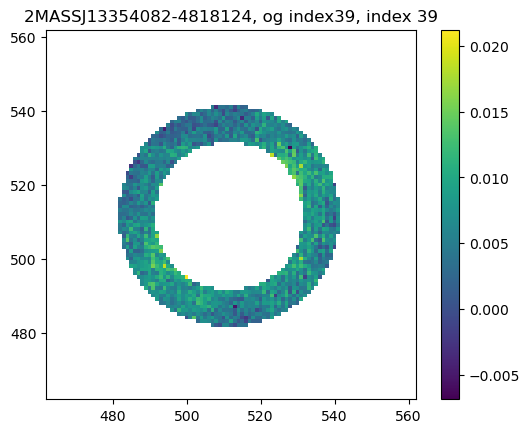

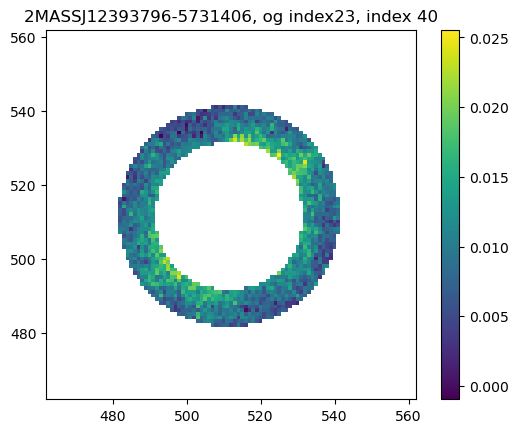

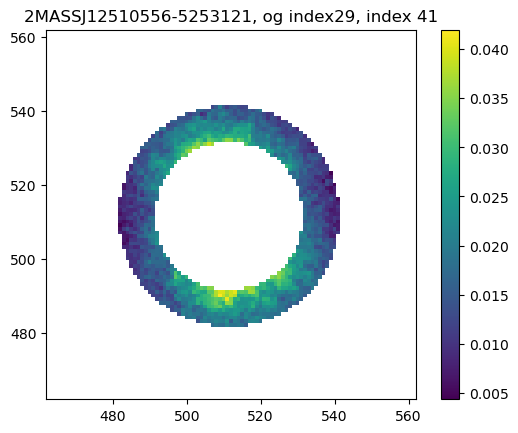

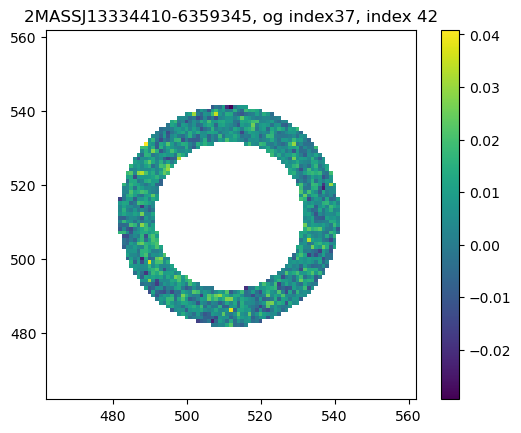

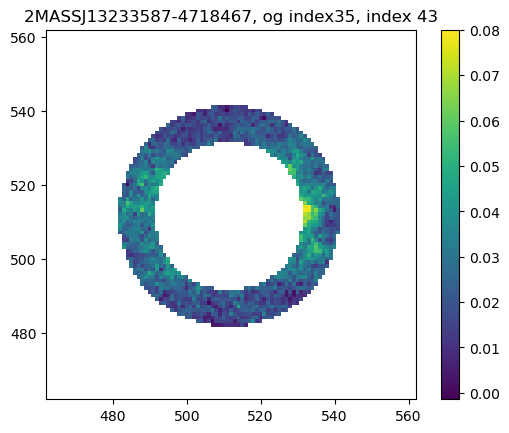

In [47]:
for i in range(len(sin_y_rms_sort)):
    plt.figure()
    plt.title(f'{yses_names_sort[i]}, og index{rms_y_idx[i]}, index {i}')
    plt.imshow(sin_y_rms_sort[i])
    plt.xlim((512-50), (512+50))
    plt.ylim((512-50), (512+50))
    plt.colorbar()
    plt.show()

In [14]:
#rms_cube for YSES
rms_y_cube = np.empty((len(sin_y_rms_sort)-1, 1024, 1024))
for i in range(0, len(sin_y_rms_sort)-1):
    idx_y_arr = rms_y_idx[0:i+2]
    rms_y_cube[i] = np.nanstd(sin_y_rms_sort[idx_y_arr], axis = 0)

/home/puck/miniconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [19]:
mean_y_cube = np.empty((len(sin_y_rms_sort)-1))
for i in range(0, len(sin_y_rms_sort)-1):
    idx_y_arr = rms_y_idx[0:i+2]
    mean = np.nanmean(sin_y_rms_sort[idx_y_arr], axis = (1, 2))
    mean_y_cube[i] = np.nanstd(mean, axis = 0)

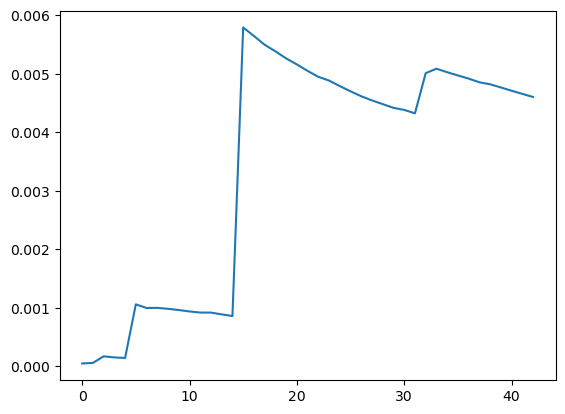

In [20]:
x = np.arange(0, len(mean_y_cube))
plt.figure()
plt.plot(x, mean_y_cube)
plt.show()

In [15]:
int_rms_y_cube = np.nansum(rms_y_cube, axis = (1, 2))

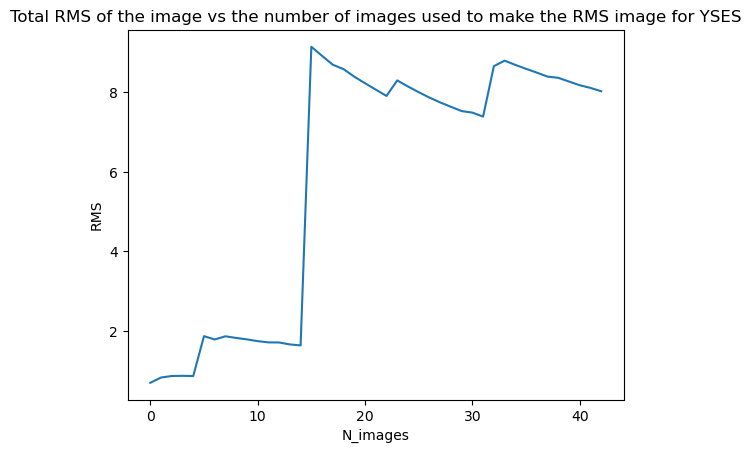

In [16]:
x_y = np.arange(0, len(int_rms_y_cube))
plt.figure()
plt.title('Total RMS of the image vs the number of images used to make the RMS image for YSES')
plt.plot(x_y, int_rms_y_cube)
plt.xlabel('N_images')
plt.ylabel('RMS')
plt.savefig('Image')
plt.show()

# WiSPiT

In [17]:
#Array with all WiSPiT single stars and everything is masked but the aperture
sin_w_clb_copy = sin_w_clb.copy()
sin_w_aper = np.array([mask_aperture(sin_w_clb_copy[i]) for i in range(len(sin_wispit))]) #Only WISPIt

In [18]:
#Calibrated and apertured data cube for the WiSPiT single stars, ordered from best to worst rms. 
rms_w_idx, sin_w_rms_sort = arr_sort_rms(sin_w_aper)

In [19]:
#rms_cube for WISPIT
rms_w_cube = np.empty((len(sin_w_rms_sort)-1, 1024, 1024))
for i in range(0, len(sin_w_rms_sort)-1):
    idx_w_arr = rms_w_idx[0:i+2]
    rms_w_cube[i] = np.nanstd(sin_w_rms_sort[idx_w_arr], axis = 0)

In [20]:
int_rms_w_cube = np.nansum(rms_w_cube, axis = (1, 2))

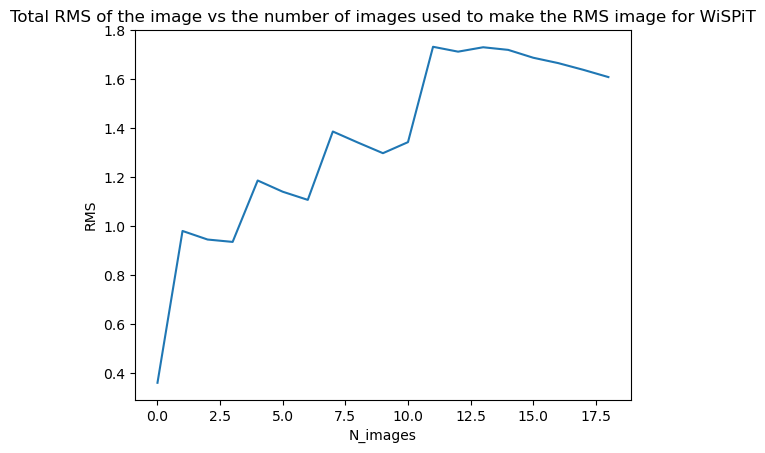

In [21]:
x_w = np.arange(0, len(int_rms_w_cube))
plt.figure()
plt.title('Total RMS of the image vs the number of images used to make the RMS image for WiSPiT')
plt.plot(x_w, int_rms_w_cube)
plt.xlabel('N_images')
plt.ylabel('RMS')
plt.savefig('Image')
plt.show()

In [22]:
print(x_w)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
